In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import os

In [6]:
result_dir = f'/home/lwang/models/HDX_LSTM/results/240918_GVP/test_result'
df = pd.DataFrame()
for file in os.listdir(result_dir):
    #if not file.startswith('GearNet'):
    #    continue
    if 'extend' in file:
        continue
    name = file.split('_')[0]
    #name = file.split('.')[0]
    table = pd.read_csv(os.path.join(result_dir, file), sep=',')
    df[name] = table['SPR']
df = df[:-1]
df.head()

,Bilstm36,Bilstm56,GAT36,GAT56,GVP56,GearNet36,GearNet56
0,0.461930,0.554774,0.048781,0.164052,0.057298,0.331229,0.460249
1,0.548281,0.433949,0.428771,0.393018,0.574453,0.593575,0.633418
2,0.696499,0.626610,0.006164,0.037221,0.177098,0.264106,0.191086
3,0.756126,0.678393,0.390020,0.513295,0.449334,0.415908,0.293802
4,0.217723,0.346179,0.401560,0.267076,0.256288,0.461466,0.530824


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), (0.8352941176470589, 0.3686274509803922, 0.0)]


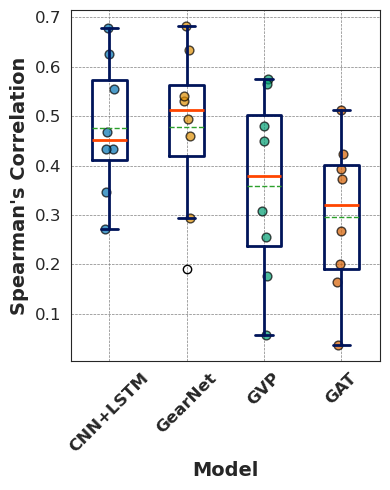

In [7]:
### style setting ###
sns.set_style('white')
boxprops = dict(linestyle='-', linewidth=2, color='#00145A')
flierprops = dict(marker='o', markerfacecolor='#FF4500', markersize=4, linestyle='none')
whiskerprops = dict(linestyle='-', linewidth=2, color='#00145A')
capprops = dict(linestyle='-', linewidth=2, color='#00145A')
medianprops = dict(linestyle='-', linewidth=2, color='#FF4500')

vals, names, xs = [], [], []
filtered_vals = []
show_cols = ['Bilstm56', 'GearNet56', 'GVP56','GAT56']
labels = ['CNN+LSTM', 'GearNet', 'GVP', 'GAT']

for i, col in enumerate(show_cols):
    q1 = np.percentile(df[col].values, 25)
    q3 = np.percentile(df[col].values, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_vals.append(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].values)
    vals.append(df[col].values)
    names.append(col[:-2])
    xs.append(np.random.normal(i + 1, 0.04, filtered_vals[-1].shape[0]))

plt.figure(figsize=(4, 5))
plt.boxplot(vals, labels=labels, boxprops=boxprops, flierprops=None, 
            whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, patch_artist=False, meanline=True, showmeans=True
            )

palette = sns.color_palette("colorblind", len(show_cols))
print(palette)

for x, val, c in zip(xs, filtered_vals, palette):
    plt.scatter(x, val, alpha=0.7, color=c, s=40, edgecolor='k')

plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(fontsize=12)
#plt.tick_params(axis='y', labelsize=12)
#plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
#plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))

plt.xlabel('Model', fontsize=14, weight='bold')
plt.ylabel("Spearman's Correlation", fontsize=14, weight='bold')
#plt.title('Comparison of radius Edge range in GearNet Model', fontsize=16, weight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

plt.tight_layout()
#plt.show()
plt.savefig('/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/SPR_boxplot.png', dpi=300)

In [31]:
## model performance scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = 'GAT'
model_id = 2
test_pred = np.load(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/pred_data/{model_id}_test_pred.npy')
test_true = np.load(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/pred_data/{model_id}_test_true.npy')
train_pred = np.load(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/pred_data/{model_id}_train_pred.npy')
train_true = np.load(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/pred_data/{model_id}_train_true.npy')

SPR_test = spearmanr(test_true, test_pred)[0]
SPR_train = spearmanr(train_true, train_pred)[0]
R2_test = r2_score(test_true, test_pred)
R2_train = r2_score(train_true, train_pred)

print(SPR_train, SPR_test)
print(R2_train, R2_test)

0.5689775325511947 0.26060222527524696
0.21148388579229038 -1.277354208135197


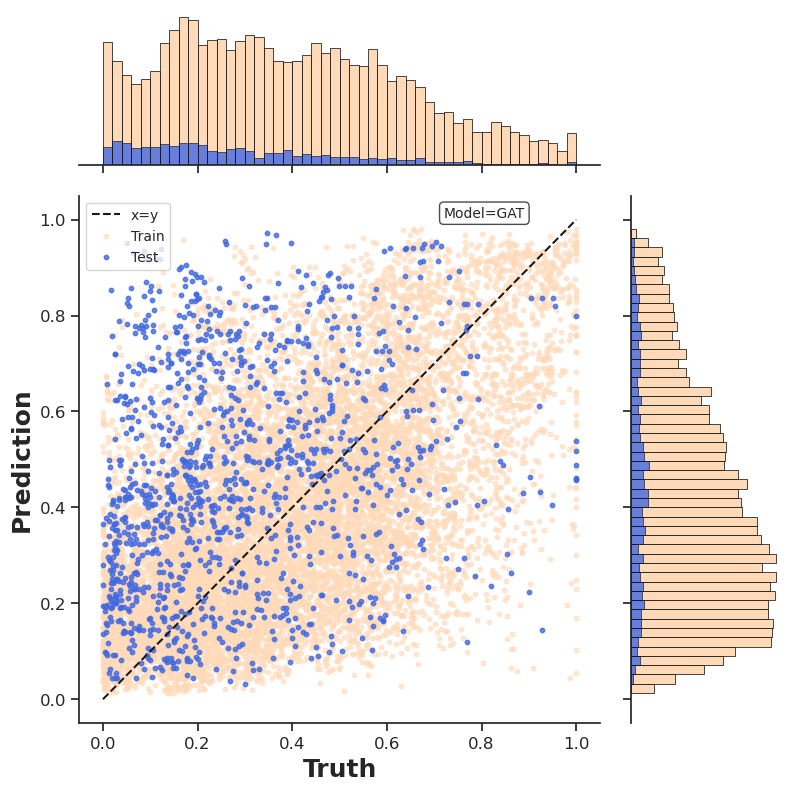

In [32]:
# Initialize the plot with a larger figure size
sns.set(style="ticks")

plot_train = True  # Set to True to plot training data
plot_test = True 
train_color = 'peachpuff'
test_color = 'royalblue'

g = sns.JointGrid(height=8, ratio=3, xlim=(-0.05, 1.05), 
                  ylim=(-0.05, 1.05))

if plot_train:
    g.ax_joint.scatter(train_true, train_pred, color=train_color, alpha=0.6, label='Train',s=10)
    train_lr = LinearRegression().fit(train_true.reshape(-1, 1), train_pred)
    train_line = train_lr.predict(np.array([train_true.min(), train_true.max()]).reshape(-1, 1))
    #g.ax_joint.plot([train_true.min(), train_true.max()], train_line, color='orange', label='Train Regression Line')
    train_r2 = r2_score(train_true, train_pred)
if plot_test:
    g.ax_joint.scatter(test_true, test_pred, color=test_color, alpha=0.8, label='Test', s=10)
    test_lr = LinearRegression().fit(test_true.reshape(-1, 1), test_pred)
    test_line = test_lr.predict(np.array([test_true.min(), test_true.max()]).reshape(-1, 1))
    #g.ax_joint.plot([test_true.min(), test_true.max()], test_line, color=test_color, label='Test Regression Line')
    test_r2 = r2_score(test_true, test_pred)

g.ax_joint.plot([0, max(train_true.max(), test_true.max())], [0, max(train_true.max(), test_true.max())], '--k', label='x=y')
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7)
#g.ax_joint.text(0.80, 0.10, f'Train R² = {train_r2:.3f}', fontsize=10, ha='left', va='top', transform=g.ax_joint.transAxes)
#g.ax_joint.text(0.80, 0.06,  f'Test R² = {test_r2:.3f}', fontsize=10,ha='left', va='top', transform=g.ax_joint.transAxes)
g.ax_joint.text(0.70, 0.98,  f'Model={model}', fontsize=10, ha='left', va='top', transform=g.ax_joint.transAxes, bbox=bbox_props)

combined_true = np.concatenate([train_true, test_true])
combined_pred = np.concatenate([train_pred, test_pred])
true_bins = np.histogram_bin_edges(combined_true, bins=50)
pred_bins = np.histogram_bin_edges(combined_pred, bins=50)

if plot_train:
    g.ax_marg_x.hist(train_true, bins=true_bins, color=train_color, alpha=1, label='Train', edgecolor='black', linewidth=0.5)
    g.ax_marg_y.hist(train_pred, bins=pred_bins, color=train_color, alpha=1, orientation='horizontal', edgecolor='black', linewidth=0.5)
if plot_test:
    g.ax_marg_x.hist(test_true, bins=true_bins, color=test_color, alpha=0.8, label='Test', edgecolor='black', linewidth=0.5)
    g.ax_marg_y.hist(test_pred, bins=pred_bins, color=test_color, alpha=0.8, orientation='horizontal', edgecolor='black', linewidth=0.5)

# Additional plot settings
g.ax_joint.set_xlabel("Truth", fontsize=18, weight='bold')
g.ax_joint.set_ylabel("Prediction", fontsize=18, weight='bold')
g.ax_joint.legend(fontsize=10, loc='upper left')
g.ax_joint.tick_params(axis='x', labelsize=12)
g.ax_joint.tick_params(axis='y', labelsize=12)

# Adjust layout and display the plot
plt.subplots_adjust(top=0.95, right=0.95)
#plt.show()
plt.savefig(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/{model}_pred_scatter_revised.png', dpi=300, bbox_inches='tight')


N_metric        5         20        50
PDB                                   
1UGH      2.720600  2.720600  2.720600
6DJL      9.047534  9.047534  9.047534
8A0E      1.656797  1.656797  1.656797
8F7A      0.477983  0.477983  0.477983
N_metric         5          20         50
PDB                                      
1UGH       2.720600   2.720600   2.720600
6DJL      11.628016  11.628016   5.197303
8A0E      64.901369  23.919720  23.919720
8F7A       7.454253   7.454253   0.477983


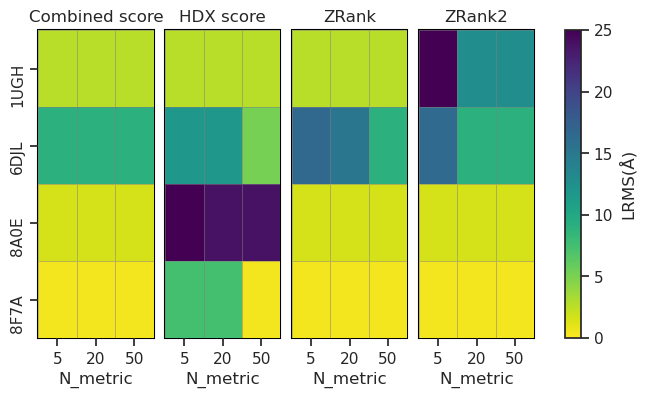

In [10]:
# plot heatmaps for HDX score, ITscorePP, Zrank and Zrank2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load data
df = pd.read_csv('/home/lwang/models/HDX_LSTM/results/240918_GVP/Hit_LRMS.csv', sep='\s+')

# Pivot the dataframe for heatmaps
df_pivot_hdx = df.pivot(index='PDB', columns='N_metric', values='combine_score')
df_pivot_it = df.pivot(index='PDB', columns='N_metric', values='HDX_score')
df_pivot_zrank = df.pivot(index='PDB', columns='N_metric', values='Zrank')
df_pivot_zrank2 = df.pivot(index='PDB', columns='N_metric', values='Zrank2')
print(df_pivot_hdx.head())
print(df_pivot_it.head())

# Plot heatmaps with a reversed color trend
fig, axes = plt.subplots(1, 4, figsize=(8, 4), gridspec_kw={'wspace': 0.1})

# Choose a color map and reverse it for high-dark, low-bright trend
#cmap = sns.color_palette("viridis", as_cmap=True).reversed()
cmap = sns.color_palette("viridis_r", as_cmap=True)

sns.set(style="ticks")
grid_line_width = 0.5
border_line_width = 1.5
border_color = 'black'
grid_line_color = (0.5, 0.5, 0.5, 0.5)
global_vmin = 0
global_vmax = 25

sns.heatmap(df_pivot_hdx, ax=axes[0], cmap=cmap, cbar=False, annot=False, vmax=global_vmax, vmin=global_vmin,
            linecolor=grid_line_color, linewidths=grid_line_width, edgecolor=border_color, yticklabels=True)
axes[0].set_title('Combined score', fontsize=12, style='normal')
axes[0].set_ylabel('')
axes[0].patch.set_edgecolor(border_color)
axes[0].patch.set_linewidth(border_line_width)

sns.heatmap(df_pivot_it, ax=axes[1], cmap=cmap, cbar=False, annot=False, vmax=global_vmax, vmin=global_vmin,
            linecolor=grid_line_color, linewidths=grid_line_width, edgecolor=border_color, yticklabels=False)
axes[1].set_title('HDX score', fontsize=12)
axes[1].set_ylabel('')
axes[1].patch.set_edgecolor(border_color)
axes[1].patch.set_linewidth(border_line_width)

sns.heatmap(df_pivot_zrank, ax=axes[2], cmap=cmap, cbar=False, annot=False, vmax=global_vmax, vmin=global_vmin,
            linecolor=grid_line_color, linewidths=grid_line_width, edgecolor=border_color, yticklabels=False)
axes[2].set_title('ZRank', fontsize=12, )
axes[2].set_ylabel('')
axes[2].patch.set_edgecolor(border_color)
axes[2].patch.set_linewidth(border_line_width)

sns.heatmap(df_pivot_zrank2, ax=axes[3], cmap=cmap, annot=False, cbar=False, vmax=global_vmax, vmin=global_vmin,
            linecolor=grid_line_color, linewidths=grid_line_width, edgecolor=border_color, yticklabels=False)
axes[3].set_title('ZRank2', fontsize=12)
axes[3].set_ylabel('')
axes[3].patch.set_edgecolor(border_color)
axes[3].patch.set_linewidth(border_line_width)

cbar = fig.colorbar(axes[3].collections[0], ax=axes, location='right', pad=0.05)
cbar.set_label('LRMS(Å)', fontsize=12)

#plt.tight_layout()
plt.show()
#plt.savefig('/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/Hit_LRMS_heatmap.png', dpi=300)

192
5


/home/lwang/models/mambaforge/envs/py3.9/lib/python3.9/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lwang/models/mambaforge/envs/py3.9/lib/python3.9/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lwang/models/mambaforge/envs/py3.9/lib/python3.9/site-packages/seaborn/distributions.py:243: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'edges       widths  
0.403596    8.276936    0.0
8.680532    8.276936    0.0
16.957468   8.276936    0.0
25.23440

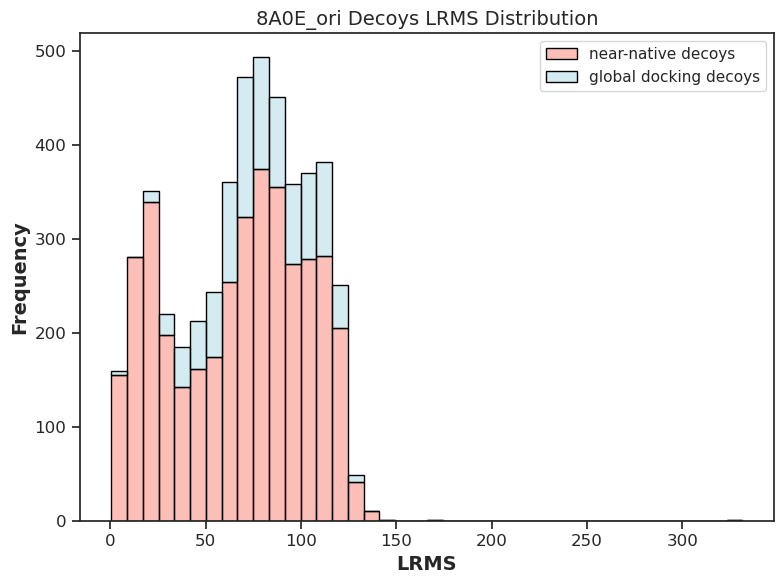

In [39]:
# plot lrmsd frequencey distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

def remove_outlier(df, column='HDX_score'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

protein_name = '8A0E_ori'
with open(f'/home/lwang/models/HDX_LSTM/data/hdock/structure/{protein_name}/eval/{protein_name}_dockq.pkl', 'rb') as f:
    initial_eval_result = pickle.load(f)
with open(f"/home/lwang/models/HDX_LSTM/data/hdock/structure/near_native/{protein_name}/{protein_name}_dockq.pkl", 'rb') as f:
    opt1_result = pickle.load(f)

opt1_dockq = np.array([result['DockQ'] for result in opt1_result[:]])
initial_dockq = np.array([result['DockQ'] for result in initial_eval_result])
print(np.sum(opt1_dockq >= 0.23))
print(np.sum(initial_dockq >= 0.23))

initial_lrmsd_scores = np.array([result['Lrms'] for result in initial_eval_result])
opt1_lrmsd_scores = np.array([result['Lrms'] for result in opt1_result])

combined_lrmsd_scores = np.concatenate((initial_lrmsd_scores, opt1_lrmsd_scores))

data = pd.DataFrame({
    'score': combined_lrmsd_scores.astype(float),
    'group': (['near-native decoys'] * len(opt1_lrmsd_scores) + 
              ['global docking decoys'] * len(initial_lrmsd_scores))
})
#data = remove_outlier(data, 'score')
bins = np.histogram_bin_edges(data['score'].to_numpy(), bins=40)

# Initialize the plot with customized style
sns.set_theme(style='ticks')
plt.figure(figsize=(8, 6))

# Plot stacked histograms
sns.histplot(data=data, x='score', hue='group', bins=bins, multiple='stack', 
             edgecolor='black', alpha=0.5, palette=['lightblue', 'salmon'])

# Customize labels and title
plt.xlabel('LRMS', fontsize=14, weight='bold')
plt.ylabel('Frequency', fontsize=14, weight='bold')
plt.title(f'{protein_name} Decoys LRMS Distribution', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

#plt.xlim(-5, 80)
# Add legend and layout adjustments
plt.legend(loc='upper right', labels=['near-native decoys', 'global docking decoys'])
plt.tight_layout()

# Show plot
plt.show()
#plt.savefig(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/{protein_name}_lrmsd_distribution.png', dpi=300)

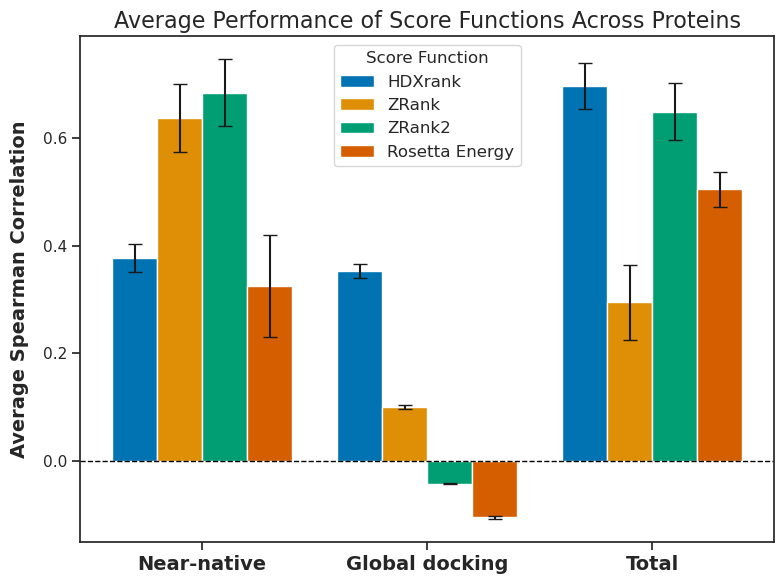

In [6]:
# compare score function SPR
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare data
data = {
    'HDX_Near_native': [0.42, 0.41, 0.53, 0.15],
    'HDX_Global_dock': [0.52, 0.27, 0.30, 0.32],
    'HDX_Total': [0.83, 0.75, 0.82, 0.39],
    'Zrank_Near_native': [0.87, 0.69, 0.71, 0.28],
    'Zrank_Global_dock': [0.13, 0.10, 0.02, 0.15],
    'Zrank_Total': [0.56, 0.48, 0.12, 0.02],
    'Zrank2_Near_native': [0.88, 0.79, 0.75, 0.32],
    'Zrank2_Global_dock': [-0.04, -0.07, -0.01, -0.05],
    'Zrank2_Total': [0.80, 0.77, 0.72, 0.31],
    'Rosetta_Near_native': [0.60, 0.03, 0.58, 0.09],
    'Rosetta_Global_dock': [-0.11, -0.12, -0.03, -0.16],
    'Rosetta_Total': [0.45, 0.71, 0.57, 0.29],
}

sns.set(style='ticks', palette='colorblind')
df = pd.DataFrame(data)

# Calculate mean and variance
means = df.mean()
variances = df.var()

# Split means and variances for plotting
scores = ['HDX', 'Zrank', 'Zrank2', 'Rosetta']
terms = ['Near_native', 'Global_dock', 'Total']
mean_values = []
var_values = []

for score in scores:
    mean_values.append([means[f'{score}_{term}'] for term in terms])
    var_values.append([variances[f'{score}_{term}'] for term in terms])

mean_values = np.array(mean_values)
var_values = np.array(var_values)

# Generate color palette
colors = sns.color_palette('colorblind', n_colors=len(scores))

# Plotting
x = np.arange(len(terms))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))

for i, (score, color) in enumerate(zip(scores, colors)):
    bars = ax.bar(x + i * bar_width, mean_values[i], yerr=var_values[i], width=bar_width, capsize=5, label=score, color=color)
    '''for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)'''

ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(['Near-native', 'Global docking', 'Total'], fontsize=14, weight='bold')
ax.set_ylabel('Average Spearman Correlation', fontsize=14, labelpad=10, weight='bold')
ax.set_title('Average Performance of Score Functions Across Proteins', fontsize=16)
ax.legend(labels=['HDXrank', 'ZRank', 'ZRank2', 'Rosetta Energy'], fontsize=12, title='Score Function')
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
# Adjust layout for better fit
plt.tight_layout()
#plt.show()
plt.savefig('/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/scores_rho_comparison.png', dpi=300)

In [4]:
# boxplot of top 10 decoys for each score function
def max_min_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
    
protein_name = '8F7A_ori'
cluster = 'cluster1_8A_manual_rescale'
trim_df = pd.read_csv(f'/home/lwang/models/HDX_LSTM/data/hdock/prediction/{protein_name}_{cluster}_HDX_scores.csv')
trim_df = trim_df[trim_df['Batch'].str.contains('REVISE')]
trim_df['HDXrank_score'] = max_min_scale(trim_df['HDX_score'].to_numpy())+\
                            max_min_scale(trim_df['zrank_score'].to_numpy())+\
                            max_min_scale(trim_df['rosetta_score'].to_numpy())
scores = ['HDX_score', 'zrank_score', 'zrank2_score', 'rosetta_score', 'HDXrank_score']
LRMS_top10 = {
    'HDX_top10': [],
    'zrank_top10': [],
    'zrank2_top10': [],
    'rosetta_top10': []
}

for i, score in enumerate(scores):
    top10 = trim_df.sort_values(score, ascending=True).iloc[:5]
    LRMS_top10[f"{score.split('_')[0]}_top10"] = list(top10['LRMS'].values)

LRMS_df = pd.DataFrame(LRMS_top10)
print(LRMS_df.min())

HDX_top10        7.454253
zrank_top10      0.477983
zrank2_top10     0.477983
rosetta_top10    0.477983
HDXrank_top10    0.477983
dtype: float64


In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('white')
boxprops = dict(linestyle='-', linewidth=2, color='#00145A')
flierprops = dict(marker='o', markerfacecolor='#FF4500', markersize=4, linestyle='none')
whiskerprops = dict(linestyle='-', linewidth=2, color='#00145A')
capprops = dict(linestyle='-', linewidth=2, color='#00145A')
medianprops = dict(linestyle='-', linewidth=2, color='#FF4500')

show_cols = LRMS_df
labels = scores

def plot_boxplot(df, labels, show_cols, protein_name):
    vals, names, xs = [], [], []
    filtered_vals = []
    for i, col in enumerate(show_cols):
        q1 = np.percentile(df[col].values, 25)
        q3 = np.percentile(df[col].values, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        filtered_vals.append(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].values)
        vals.append(df[col].values)
        names.append(col[:-2])
        xs.append(np.random.normal(i + 1, 0.04, filtered_vals[-1].shape[0]))

    plt.figure(figsize=(4, 5))
    plt.boxplot(vals, labels=labels, boxprops=boxprops, flierprops=None, 
                whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, patch_artist=False, meanline=True, showmeans=True
                )

    palette = sns.color_palette("colorblind", len(show_cols))

    for x, val, c in zip(xs, filtered_vals, palette):
        plt.scatter(x, val, alpha=0.7, color=c, s=40, edgecolor='k')

    plt.xticks(rotation=45, fontsize=12, weight='bold')
    plt.yticks(fontsize=12)
    plt.ylabel("avg LRMS", fontsize=14, weight='bold')
    plt.title(f'{protein_name}', fontsize=16, weight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

    plt.tight_layout()
    plt.show()

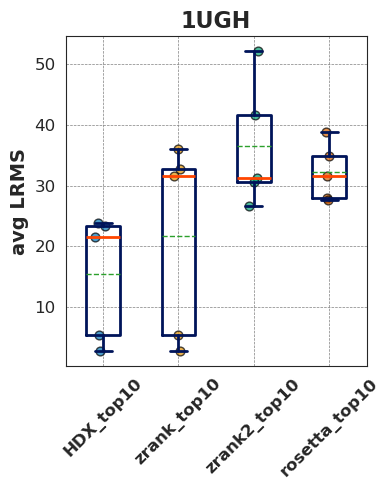

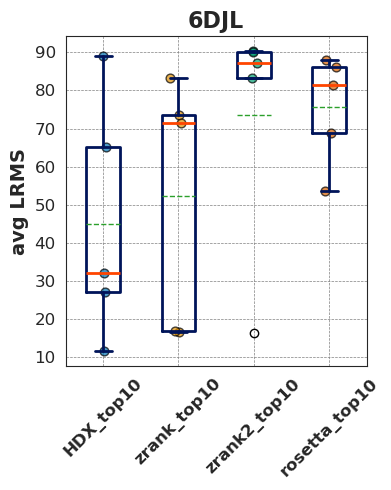

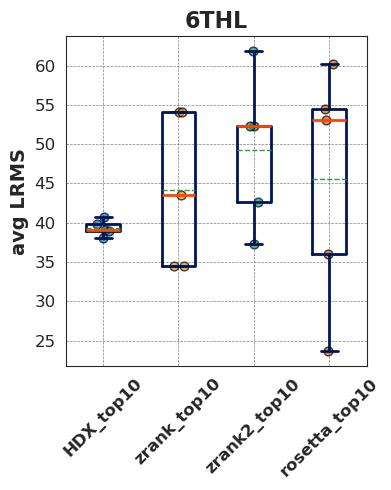

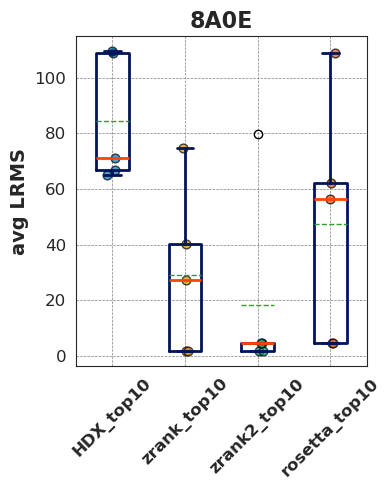

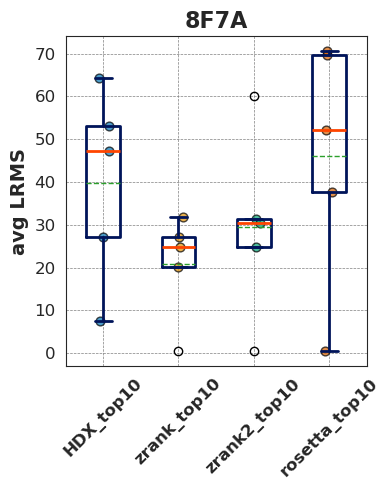

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
boxprops = dict(linestyle='-', linewidth=2, color='#00145A')
flierprops = dict(marker='o', markerfacecolor='#FF4500', markersize=4, linestyle='none')
whiskerprops = dict(linestyle='-', linewidth=2, color='#00145A')
capprops = dict(linestyle='-', linewidth=2, color='#00145A')
medianprops = dict(linestyle='-', linewidth=2, color='#FF4500')

def plot_boxplot(df, labels, show_cols, protein_name):
    vals, names, xs = [], [], []
    filtered_vals = []
    for i, col in enumerate(show_cols):
        q1 = np.percentile(df[col].values, 25)
        q3 = np.percentile(df[col].values, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        filtered_vals.append(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].values)
        vals.append(df[col].values)
        names.append(col[:-2])
        xs.append(np.random.normal(i + 1, 0.04, filtered_vals[-1].shape[0]))

    plt.figure(figsize=(4, 5))
    plt.boxplot(vals, labels=labels, boxprops=boxprops, flierprops=None, 
                whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, patch_artist=False, meanline=True, showmeans=True
                )

    palette = sns.color_palette("colorblind", len(show_cols))

    for x, val, c in zip(xs, filtered_vals, palette):
        plt.scatter(x, val, alpha=0.7, color=c, s=40, edgecolor='k')

    plt.xticks(rotation=45, fontsize=12, weight='bold')
    plt.yticks(fontsize=12)
    plt.ylabel("avg LRMS", fontsize=14, weight='bold')
    plt.title(f'{protein_name}', fontsize=16, weight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

    plt.tight_layout()
    plt.show()

for score_file in os.listdir('/home/lwang/models/HDX_LSTM/data/hdock/prediction/'):
    if not score_file.endswith('HDX_scores.csv'):
        continue
    trim_df = pd.read_csv(f'/home/lwang/models/HDX_LSTM/data/hdock/prediction/{score_file}')
    trim_df = trim_df[trim_df['Batch'].str.contains('REVISE')]
    protein_name = score_file[:4]
    scores = ['HDX_score', 'zrank_score', 'zrank2_score', 'rosetta_score']
    LRMS_top10 = {
        'HDX_top10': [],
        'zrank_top10': [],
        'zrank2_top10': [],
        'rosetta_top10': []
    }
    for i, score in enumerate(scores):
        top10 = trim_df.sort_values(score, ascending=True).iloc[:5]
        LRMS_top10[f"{score.split('_')[0]}_top10"] = list(top10['LRMS'].values)
    LRMS_df = pd.DataFrame(LRMS_top10)
    plot_boxplot(LRMS_df, LRMS_df.columns, LRMS_df.columns, protein_name)

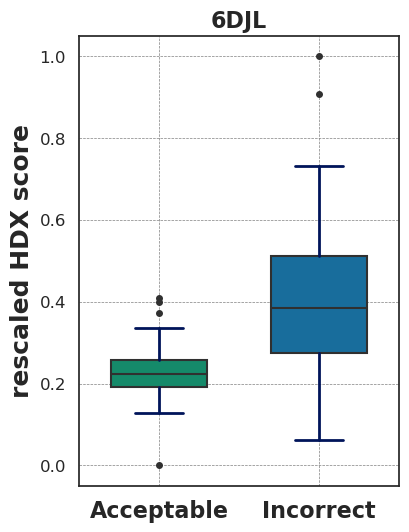

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import spearmanr
from matplotlib.ticker import AutoMinorLocator

protein_name = '6DJL'
cluster = 'cluster1_8A_manual_rescale'
score_df = pd.read_csv(f'/home/lwang/models/HDX_LSTM/data/hdock/prediction/{protein_name}_{cluster}_HDX_scores.csv')

def max_min_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def remove_outlier(df, column='HDX_score'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return filtered_df

def plot_score_vs_ligand_rmsd(df, score_column='HDX_score', x_label='LRMS', y_label='HDX_score', protein_name=None):
    # Calculate Spearman and Pearson correlation
    spearman_corr, _ = spearmanr(df['LRMS'], df[score_column])
    
    plt.figure(figsize=(8, 6))
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.5)
    
    # Scatter plot with different colors for each classification
    palette = {0: '#4169E1', 1: '#006400', 2: '#DAA520', 3: '#DC143C'}
    legend_labels = {0: 'Incorrect', 1: 'Acceptable', 2: 'Medium', 3: 'High'}
    colors = df['classification'].map(palette)

    plt.scatter(df['LRMS'].to_numpy(), df[score_column].to_numpy(), alpha=0.7, edgecolor='black', c=colors, s=20)
    
    plt.title(f'{protein_name}, SCC: {spearman_corr:.2f}', fontsize=20)
    plt.minorticks_on()
    plt.tick_params(axis='both', labelsize=12)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
    
    # Set legend with proper labels
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], 
                          markerfacecolor=palette[i], markersize=10, markeredgecolor='black') for i in range(4)]
    plt.legend(handles=handles, title='CAPRI Classification')
    
    plt.tight_layout()
    plt.show()

sns.set_theme(style="white")

# Adjust line properties for aesthetics
boxprops = dict(linestyle='-', linewidth=2, color='#00145A')
flierprops = dict(marker='o', markersize=4, linestyle='none')
whiskerprops = dict(linestyle='-', linewidth=2, color='#00145A')
capprops = dict(linestyle='-', linewidth=2, color='#00145A')
medianprops = dict(linestyle='-', linewidth=2, color='#FF4500')

# Apply scaling function to HDX scores
score_df['rescale_HDX_score'] = max_min_scale(score_df['HDX_score'].to_numpy())

plt.figure(figsize=(4, 6))

'''palette = {0: '#0273b2', 1: '#019e73', 2: '#de8f06', 3: '#d55e00'}
legend_labels = {0: 'Incorrect', 1: 'Acceptable', 2: 'Medium', 3: 'High'}
custom_palette = [palette[i] for i in range(3, -1, -1)]
plot_labels = ['Incorrect', 'Acceptable', 'Medium', 'High']
order = [3, 2, 1, 0]'''

custom_palette = ['#019e73', '#0273b2']
plot_labels = ['Acceptable', 'Incorrect']
order = [1,0]

# Enhanced Box Plot
sns.boxplot(
    x='classification',
    y='rescale_HDX_score',
    data=score_df,
    palette=custom_palette,  # custom muted colors
    order=order,
    flierprops=flierprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    width=0.6  # Adjust box width
)

# Polished Labels
#plt.xlabel('Classification', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('rescaled HDX score', fontsize=18, fontweight='bold', rotation=90)
plt.xlabel('')
plt.title(f'{protein_name[:4]}', fontsize=16, fontweight='bold')

# Improved Tick Labels
plt.xticks(ticks=[0,1], labels=plot_labels, fontsize=16, weight='bold')
plt.yticks(fontsize=12)

# Fine-tuned Grid
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)
#plt.show()
plt.savefig(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/{protein_name}_CAPRI_HDX_boxplot2_revised.png', dpi=300)

1UGH
[ 2.72059962 23.79031962 21.56928868 23.3981859   5.3224846  36.26100351
 22.48333801 22.87594713 35.63365688 23.80089251] [2 0 0 0 1 0 0 0 0 0]
[ 2.72059962 23.79031962 21.56928868 23.3981859   5.3224846  36.26100351
 22.48333801 22.87594713 35.63365688 23.80089251] [2 0 0 0 1 0 0 0 0 0]
6DJL
[27.18379329 32.18569335 11.62801553 65.16225342 89.000798   79.83455371
 86.19039827 56.45661181 90.6636579  20.75137434] [0 0 0 0 0 0 0 0 0 0]
[27.18379329 32.18569335 11.62801553 65.16225342 89.000798   79.83455371
 86.19039827 56.45661181 90.6636579  20.75137434] [0 0 0 0 0 0 0 0 0 0]
8A0E_ori
[ 66.85060629 109.02060863 109.49381929  71.13377292  64.9013688
  64.83702345  43.43808023  74.27732161  53.84416715  72.78951828] [0 0 0 0 0 0 0 0 0 0]
[ 66.85060629 109.02060863 109.49381929  71.13377292  64.9013688
  64.83702345  43.43808023  74.27732161  53.84416715  72.78951828] [0 0 0 0 0 0 0 0 0 0]
8F7A_ori
[ 7.45425333 64.30100986 47.34559487 52.97609003 27.17020019  7.57699098
 23.8252346

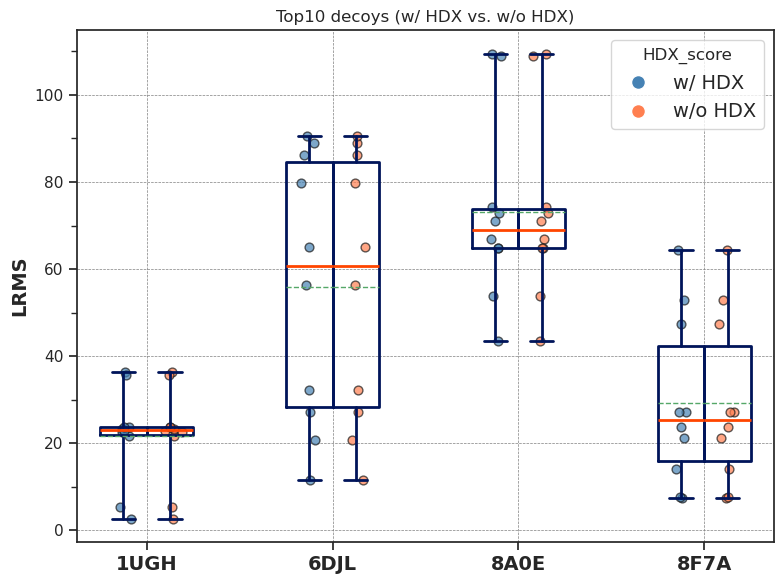

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

def max_min_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

protein_list = ['1UGH', '6DJL', '8A0E_ori', '8F7A_ori']
cluster_list = [2,1,1,1]
energy_score = 'HDX_score'
HDX_return_n = 100
top_n = 10

dfs=[]
keep_cols = ['Batch', 'HDX_score', 'zrank_score', 'LRMS', 'iRMS', 'fnat', 'state']
for protein, cluster_id in zip(protein_list, cluster_list):
    score_df = pd.read_csv(f'/home/lwang/models/HDX_LSTM/data/hdock/prediction/{protein}_cluster{cluster_id}_8A_manual_rescale_HDX_scores.csv')

    rank_df = score_df[score_df['Batch'].str.contains('REVISED')].copy()
    rank_df = rank_df.drop_duplicates(subset=['Batch'])

    top_50 = rank_df.nsmallest(HDX_return_n, 'HDX_score')
    top_50['combine_score'] = max_min_scale(top_50[energy_score].to_numpy()) #+\
                                 #max_min_scale(top_50['HDX_score'].to_numpy()) +\
                                 #   max_min_scale(top_50['rosetta_score'].to_numpy())
    top_5 = top_50.sort_values(by='combine_score', ascending=True)[:top_n]
    top_5['state'] = 'w/ HDX'

    zrank_top5 = rank_df.sort_values(by=energy_score, ascending=True)[:top_n]
    zrank_top5['state'] = 'w/o HDX'

    print(protein)
    print(top_5['LRMS'].values, top_5['classification'].values)
    print(zrank_top5['LRMS'].values, zrank_top5['classification'].values)

    combined_df = pd.concat([top_5[keep_cols], zrank_top5[keep_cols]]).drop_duplicates().reset_index(drop=True)
    combined_df['protein']=protein
    dfs.append(combined_df)

combined_df = pd.concat(dfs, axis=0).reset_index(drop=True)
metric = 'LRMS'

filtered_vals = []
vals = []
names = []
xs = []

# Define the proteins and states to visualize
boxprops = dict(linestyle='-', linewidth=2, color='#00145A')
flierprops = dict(marker='o', markerfacecolor='#FF4500', markersize=4, linestyle='none')
whiskerprops = dict(linestyle='-', linewidth=2, color='#00145A')
capprops = dict(linestyle='-', linewidth=2, color='#00145A')
medianprops = dict(linestyle='-', linewidth=2, color='#FF4500')

show_cols = combined_df['protein'].unique()
labels = ['1UGH', '6DJL', '8A0E', '8F7A']
states = ['w/ HDX', 'w/o HDX']

state_colors = {
    'w/ HDX': 'steelblue',   # Color for "w/ HDX"
    'w/o HDX': 'coral'       # Color for "w/o HDX"
}
sns.set_theme(style='ticks')
# Prepare data for the boxplot
positions = []
index = 0
for i, protein in enumerate(show_cols):
    for j, state in enumerate(states):
        # Extract values for each state of the protein
        state_data = combined_df[(combined_df['protein'] == protein) & (combined_df['state'] == state)]['LRMS'].values

        # Calculate the IQR to filter outliers
        '''q1 = np.percentile(state_data, 25)
        q3 = np.percentile(state_data, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr'''

        #filtered_vals.append(state_data[(state_data >= lower_bound) & (state_data <= upper_bound)])
        filtered_vals.append(state_data)
        vals.append(state_data)

        # Create labels for boxplot, and add positions
        names.append(f"{protein} ({state})")
        positions.append(i * 2 + j * 0.5)  # Adjust positions to group the boxes closely

        # Scatter plot positions
        xs.append(np.random.normal(i * 2 + j * 0.5, 0.04, len(filtered_vals[-1])))

# Plot configuration
sns.set_theme(style='ticks')
plt.figure(figsize=(8,6))

plt.boxplot(vals, positions=positions, boxprops=boxprops, flierprops=None, 
            whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, 
            patch_artist=False, meanline=True, showmeans=True, whis=[0, 100])

# Use a color palette to differentiate scatter points
for patch, state, pos in zip(plt.gca().artists, [states[j] for _ in show_cols for j in range(2)], positions):
    patch.set_facecolor(state_colors[state])

# Add scatter points to the plot
for x, val, state in zip(xs, filtered_vals, [states[j] for _ in show_cols for j in range(2)]):
    plt.scatter(x, val, alpha=0.7, color=state_colors[state], s=40, edgecolor='k')

# Customize the plot
plt.title(f"Top{top_n} decoys (w/ HDX vs. w/o HDX)")
plt.ylabel("LRMS", fontsize=14, weight='bold')

# Customize x-ticks for grouped visualization
grouped_labels = [f"{protein}" for protein in labels]
group_positions = [i * 2 + 0.25 for i in range(len(show_cols))]
plt.xticks(group_positions, grouped_labels, fontsize=14, weight='bold')
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.grid(True, which='Major', linestyle='--', linewidth=0.5, color='gray')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=state_colors[state], markersize=10, label=state) for state in states]
plt.legend(title=energy_score, handles=handles, loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
#plt.savefig(f'/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/top10_HDX+{energy_score}_boxplot.png', dpi=300)
